In [1]:
import os
import gc
import sys
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# Read in and Prepare

In [2]:
# Fnames and Paths
fnames = os.listdir("data/")
print(fnames)

['features.csv', 'sampleSubmission.csv', 'stores.csv', 'test.csv', 'train.csv']


In [3]:
# Read in Features View
df_ft = pd.read_csv("data/features.csv")
pre_ = df_ft.shape[0]
df_ft.drop_duplicates(inplace=True)
assert df_ft.shape[0] == pre_

In [4]:
# Read in Stores View
df_stores = pd.read_csv("data/stores.csv")
pre_ = df_stores.shape[0]
df_stores.drop_duplicates(inplace=True)
assert df_stores.shape[0] == pre_

In [5]:
# Combine Stores and Features
df_ft = pd.merge(
    df_ft,
    df_stores,
    how='left',
    on=['Store'],
    validate='m:1'
)
del df_stores
gc.collect()

70

# EDA

In [6]:
# Fill Rates
fr = pd.DataFrame({
    'Column': [x for x in list(df_ft.columns)],
    'Fill Rate': [np.mean(df_ft[x].notnull()) for x in list(df_ft.columns)]
})
fr.sort_values(by=['Fill Rate'], ascending=False, inplace=True)
fr

,Column,Fill Rate
0,Store,1.000000
1,Date,1.000000
2,Temperature,1.000000
3,Fuel_Price,1.000000
11,IsHoliday,1.000000
12,Type,1.000000
13,Size,1.000000
9,CPI,0.928571
10,Unemployment,0.928571
8,MarkDown5,0.494505


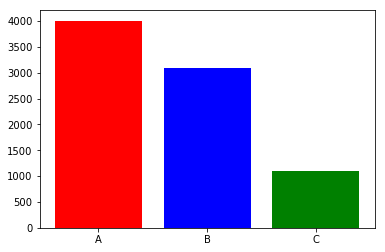

In [7]:
# Vol of each store type
storetypes_vc = pd.DataFrame(df_ft.Type.value_counts())
storetypes_vc.reset_index(inplace=True)
fig, ax = plt.subplots(1, 1)
ax.bar(storetypes_vc['index'], storetypes_vc['Type'], color=['r', 'b', 'g'])
plt.show(block=False)

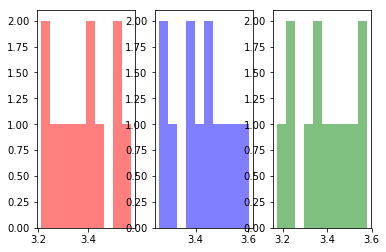

In [8]:
# Volume By Month
df_ft['Date'] = pd.to_datetime(df_ft['Date'])
df_ft['Month'] = df_ft['Date'].dt.month.astype(str)
df_agg = df_ft.groupby(
    by=['Type', 'Month'], as_index=False
).agg({'Fuel_Price': 'mean'})
df_agg.sort_values(
    by=['Type', 'Month'],
    ascending=True,
    inplace=True
)
fig, ax = plt.subplots(1, 3)
ax[0].hist(df_agg.loc[df_agg['Type'] == 'A', :]['Fuel_Price'], alpha=.5, color='r')
ax[1].hist(df_agg.loc[df_agg['Type'] == 'B', :]['Fuel_Price'], alpha=.5, color='b')
ax[2].hist(df_agg.loc[df_agg['Type'] == 'C', :]['Fuel_Price'], alpha=.5, color='g')
plt.show(block=False)

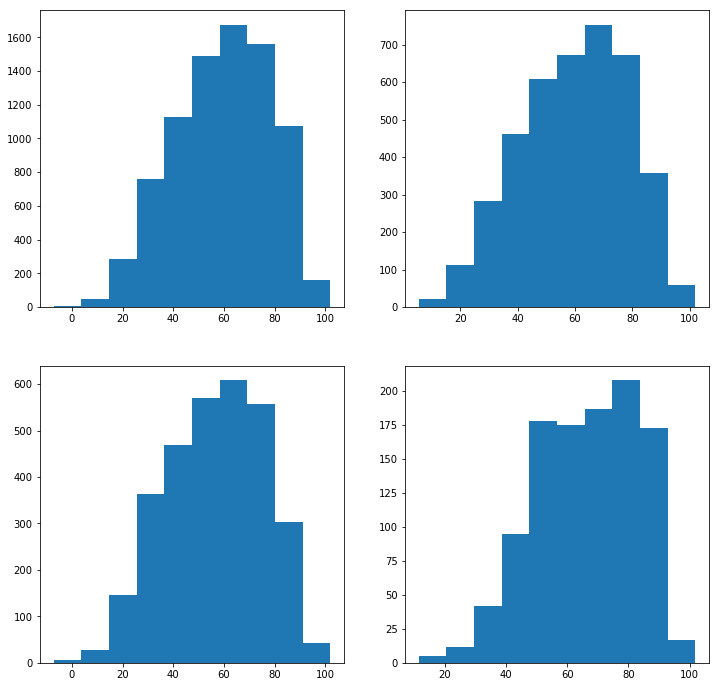

In [9]:
# Temperature
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
ax[0, 0].hist(df_ft['Temperature'])
ax[0, 1].hist(df_ft.loc[df_ft['Type'] == 'A', :]['Temperature'])
ax[1, 0].hist(df_ft.loc[df_ft['Type'] == 'B', :]['Temperature'])
ax[1, 1].hist(df_ft.loc[df_ft['Type'] == 'C', :]['Temperature'])
plt.show(block=False)

/anaconda2/envs/litesaber_jupyter/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda2/envs/litesaber_jupyter/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([507.,   0.,   0.,   0.,   0.,   0.,   0.,  54., 246., 207.]),
 array([126.064     , 135.93785314, 145.81170628, 155.68555942,
        165.55941256, 175.4332657 , 185.30711884, 195.18097198,
        205.05482512, 214.92867826, 224.8025314 ]),
 <a list of 10 Patch objects>)

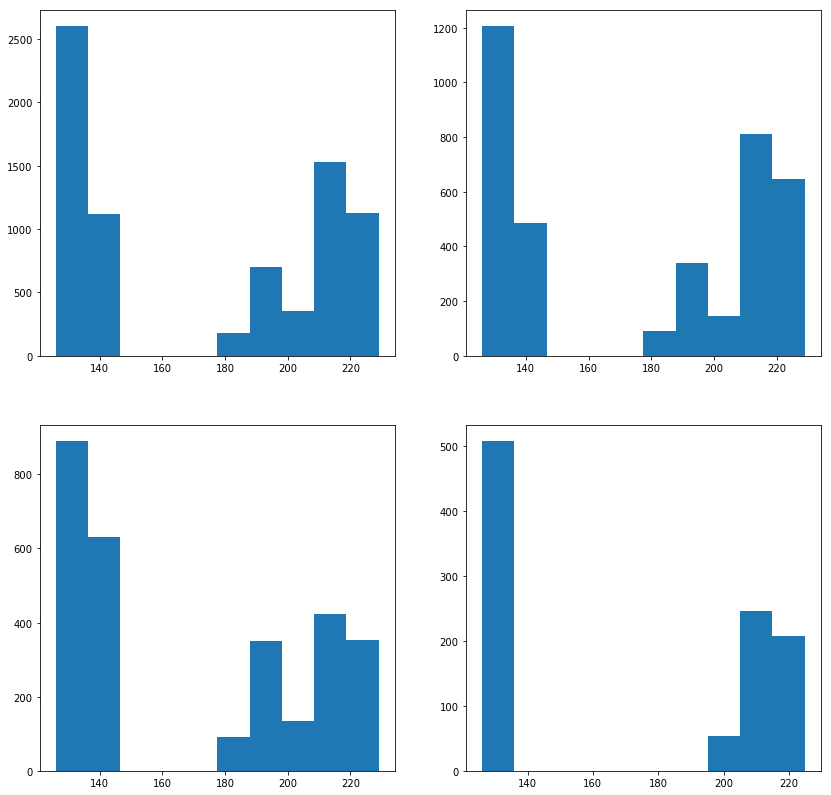

In [10]:
# CPI
fig, ax = plt.subplots(2, 2, figsize=(14, 14))
ax[0, 0].hist(df_ft['CPI'])
ax[0, 1].hist(df_ft.loc[df_ft.Type == 'A', :]['CPI'])
ax[1, 0].hist(df_ft.loc[df_ft.Type == 'B', :]['CPI'])
ax[1, 1].hist(df_ft.loc[df_ft.Type == 'C', :]['CPI'])

In [11]:
# Unemployment
df_ft['Unemployment'].describe()

count    7605.000000
mean        7.826821
std         1.877259
min         3.684000
25%         6.634000
50%         7.806000
75%         8.567000
max        14.313000
Name: Unemployment, dtype: float64

/anaconda2/envs/litesaber_jupyter/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda2/envs/litesaber_jupyter/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 69., 113., 173., 261., 116., 116.,  40.,  26.,  13.,  87.]),
 array([ 4.872 ,  5.8161,  6.7602,  7.7043,  8.6484,  9.5925, 10.5366,
        11.4807, 12.4248, 13.3689, 14.313 ]),
 <a list of 10 Patch objects>)

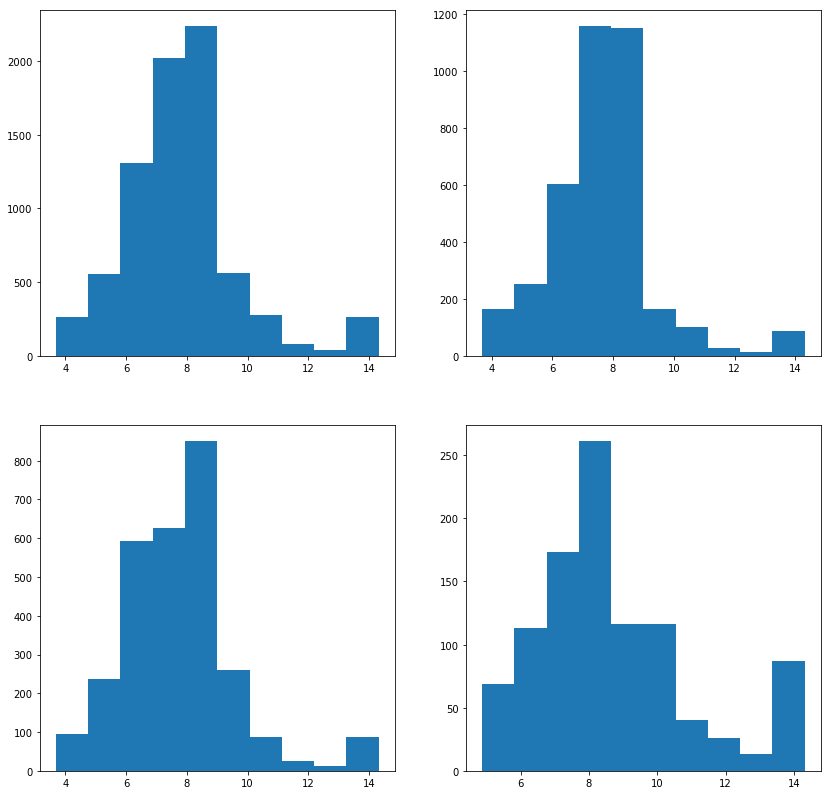

In [63]:
fig, ax = plt.subplots(2, 2, figsize=(14, 14))
ax[0, 0].hist(df_ft['Unemployment'])
ax[0, 1].hist(df_ft.loc[df_ft.Type == 'A', :]['Unemployment'])
ax[1, 0].hist(df_ft.loc[df_ft.Type == 'B', :]['Unemployment'])
ax[1, 1].hist(df_ft.loc[df_ft.Type == 'C', :]['Unemployment'])

(array([728.,   0.,   0.,   0., 182.,   0.,   0.,   0.,   0., 182.]),
 array([39690. , 40019.8, 40349.6, 40679.4, 41009.2, 41339. , 41668.8,
        41998.6, 42328.4, 42658.2, 42988. ]),
 <a list of 10 Patch objects>)

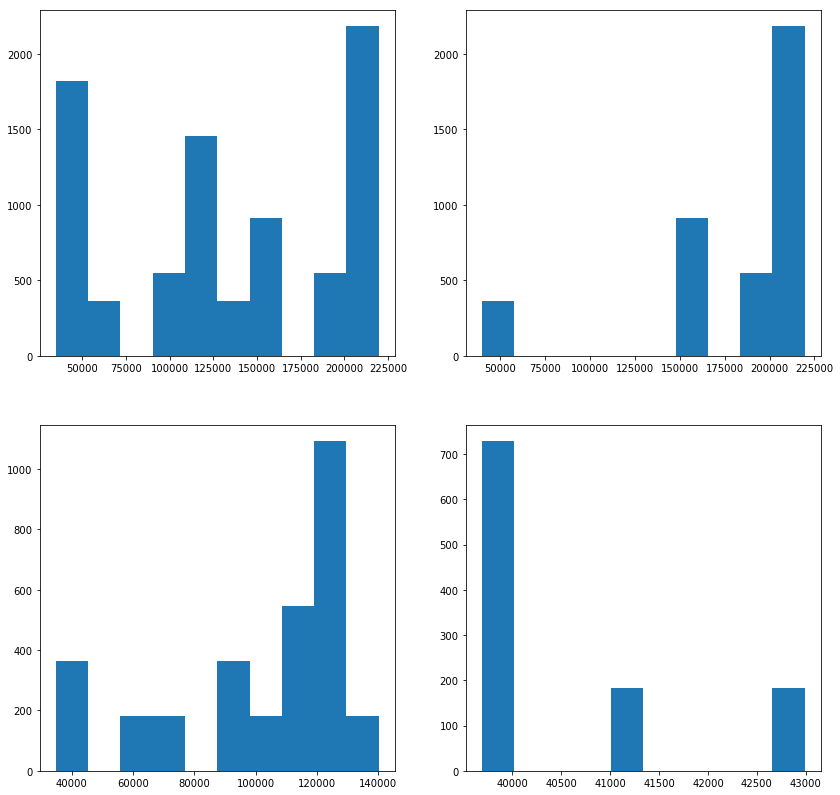

In [62]:
fig, ax = plt.subplots(2, 2, figsize=(14, 14))
ax[0, 0].hist(df_ft['Size'])
ax[0, 1].hist(df_ft.loc[df_ft.Type == 'A', :]['Size'])
ax[1, 0].hist(df_ft.loc[df_ft.Type == 'B', :]['Size'])
ax[1, 1].hist(df_ft.loc[df_ft.Type == 'C', :]['Size'])

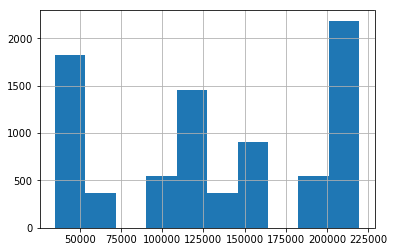

In [61]:
# Size
df_ft.Size.hist()

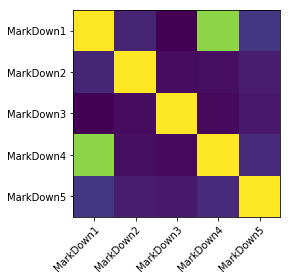

In [9]:
# Heatmap of Markdowns
df_md = df_ft.loc[:, [x for x in df_ft.columns if 'markdown' in x.lower()]]
df_md = df_md.corr()
fig, ax = plt.subplots()
im = ax.imshow(df_md)

# We want to show all ticks...
ax.set_xticks(np.arange(df_md.shape[0]))
ax.set_yticks(np.arange(df_md.shape[0]))
# ... and label them with the respective list entries
ax.set_xticklabels(list(df_md.columns))
ax.set_yticklabels(list(df_md.columns))

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
# for i in range(df_md.shape[0]):
#     for j in range(df_md.shape[0]):
#         text = ax.text(j, i, df_md[i, j],
#                        ha="center", va="center", color="w")
fig.tight_layout()
plt.show()

/anaconda2/envs/litesaber_jupyter/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda2/envs/litesaber_jupyter/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


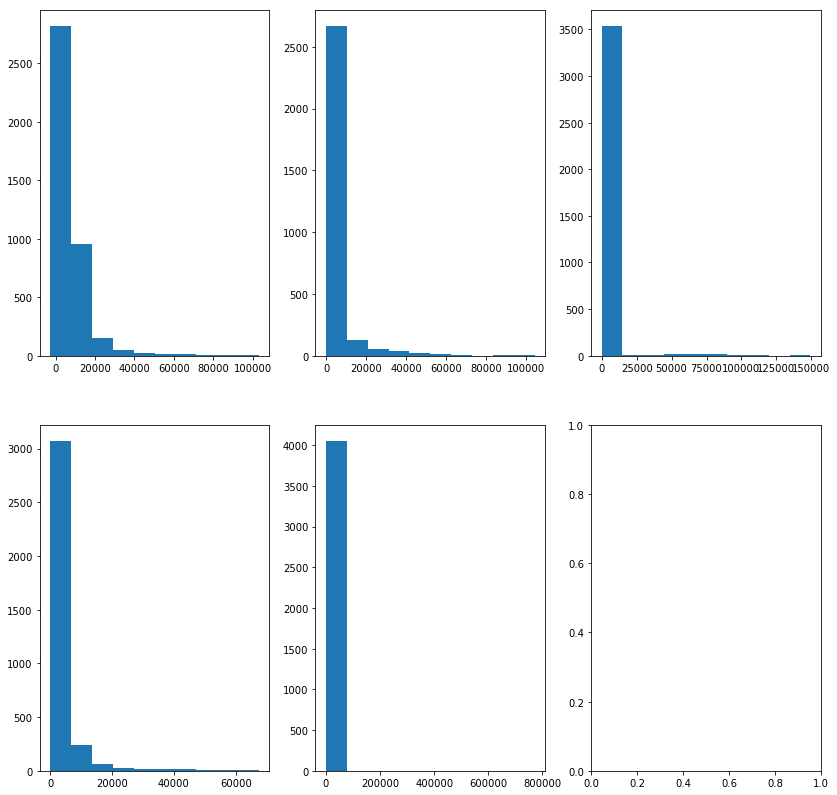

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(14, 14))
ax[0, 0].hist(df_ft['MarkDown1'])
ax[0, 1].hist(df_ft['MarkDown2'])
ax[0, 2].hist(df_ft['MarkDown3'])
ax[1, 0].hist(df_ft['MarkDown4'])
ax[1, 1].hist(df_ft['MarkDown5'])
plt.show()

/anaconda2/envs/litesaber_jupyter/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda2/envs/litesaber_jupyter/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


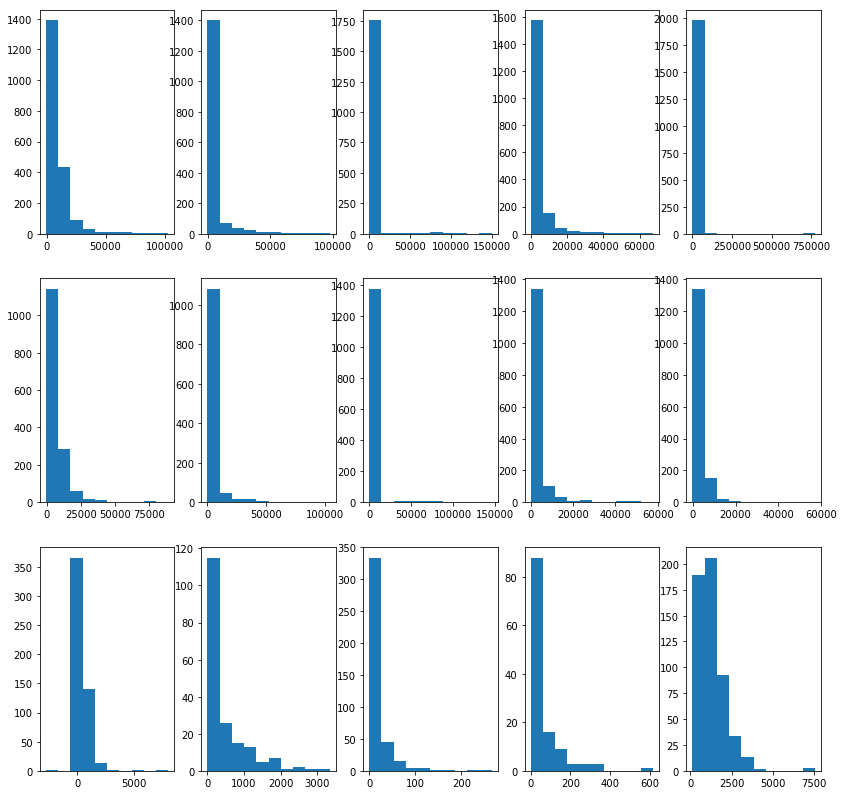

In [25]:
# Markdowns by Type
fig, ax = plt.subplots(3, 5, figsize=(14, 14))
types = ['A', 'B', 'C']
mds = [c for c in df_ft.columns if 'markdown' in c.lower()]
for ty in types:
    t_ = types.index(ty)
    cut = df_ft.loc[df_ft['Type'] == ty, :]
    for md in mds:
        m_ = mds.index(md)
        ax[t_, m_].hist(cut[md])
plt.show()

In [ ]:
# Size to Sales
agg = df_ft.groupby(by=[''])
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.scatter()

In [ ]:
# Markdowns


In [12]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [13]:
df_train.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [14]:
df_test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
